In [3]:
from mnist import MNIST
import numpy as np
from datetime import datetime
from scipy.stats import norm
from scipy.stats import multivariate_normal as mvn
from scipy.stats import bernoulli as brn
from matplotlib import pyplot as plt
import cv2 as cv
from sklearn.ensemble import RandomForestClassifier
#import pillow as pil

In [29]:
mndata = MNIST('.')
tr_images, tr_labels = mndata.load_training()
ts_images, ts_labels = mndata.load_testing()

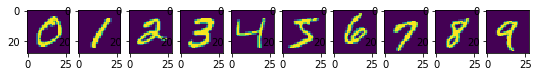

In [30]:
#Untouched Digits
plt.figure(figsize=(9,9))
label = set(tr_labels)
Y = np.array(tr_labels)
X = tr_images
X = np.array(X)
for i in label:
    plt.subplot(1,10, i+1)
    img = X[Y==i, : ][0].reshape(28,28)
    #print(img)
    plt.imshow(img)

In [31]:
def accuracy_score(y_train, y_pred_rf):
    return np.mean(y_pred_rf == y_train)

In [23]:
#untouched 
def RandomForest(X_train,y_train, n_estimators, max_depth):
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    clf_rf = RandomForestClassifier(n_estimators = n_estimators, max_depth = max_depth)
    clf_rf.fit(X_train, y_train)
    y_pred_rf = clf_rf.predict(X_train)
    print(type(y_pred_rf))
    acc_rf = accuracy_score(y_train, y_pred_rf)
    return acc_rf

In [24]:

t0 = datetime.now()
print("Train accuracy with n_estimators = 10, max_depth = 4:", RandomForest(tr_images, tr_labels, 10, 4))
print("Time to compute train accuracy:", (datetime.now() - t0), "Train size:", len(tr_labels))

t0 = datetime.now()
print("Test accuracy n_estimators = 10, max_depth = 16:", RandomForest(ts_images, ts_labels, 10, 16))
print("Time to compute test accuracy:", (datetime.now() - t0), "Test size:", len(ts_labels))

t0 = datetime.now()
print("Train accuracy n_estimators = 30, max_depth = 4:", RandomForest(tr_images, tr_labels, 30, 4))
print("Time to compute train accuracy:", (datetime.now() - t0), "Train size:", len(tr_labels))

t0 = datetime.now()
print("Test accuracy n_estimators = 30, max_depth = 16:", RandomForest(ts_images, ts_labels, 30 , 16))
print("Time to compute test accuracy:", (datetime.now() - t0), "Test size:", len(ts_labels))


<class 'numpy.ndarray'>
Train accuracy with n_estimators = 10, max_depth = 4: 0.7558333333333334
Time to compute train accuracy: 0:00:03.969352 Train size: 60000
<class 'numpy.ndarray'>
Test accuracy n_estimators = 10, max_depth = 16: 0.9987
Time to compute test accuracy: 0:00:00.959434 Test size: 10000
<class 'numpy.ndarray'>
Train accuracy n_estimators = 30, max_depth = 4: 0.7849333333333334
Time to compute train accuracy: 0:00:06.730999 Train size: 60000
<class 'numpy.ndarray'>
Test accuracy n_estimators = 30, max_depth = 16: 0.9998
Time to compute test accuracy: 0:00:01.980734 Test size: 10000


In [25]:
#Streched bounded

def bbox2(img):
    img = img.reshape(28,28)
    rows = np.any(img, axis=1)
    cols = np.any(img, axis=0)
    rmin, rmax = np.where(rows)[0][[0, -1]]
    cmin, cmax = np.where(cols)[0][[0, -1]]

    #print("{} {} {} {}".format(rmin, rmax, cmin, cmax)) 
    return rmin, rmax, cmin, cmax

In [26]:
def StrechedBounded(tr_images):
    tr_images = np.array(tr_images)
    tr_images1 = []
    for img in tr_images:
        rmin, rmax, cmin, cmax = bbox2(img)
        img = img.reshape(28,28)
        image = img[rmin:rmin+rmax, cmin:cmin+cmax]
        image = image.flatten()
        image.resize((20,20))
        #image = cv.rectangle(img, (cmin, rmin), (cmax, cmin), (255,0,0), 2)
        image = image.flatten()
        tr_images1.append(image)
    return tr_images1

In [27]:
mndata = MNIST('.')
tr_images, tr_labels = mndata.load_training()
ts_images, ts_labels = mndata.load_testing()

tr_images = StrechedBounded(tr_images)
ts_images = StrechedBounded(ts_images)

In [28]:
t0 = datetime.now()
print("Train accuracy with n_estimators = 10, max_depth = 4:", RandomForest(tr_images, tr_labels, 10, 4))
print("Time to compute train accuracy:", (datetime.now() - t0), "Train size:", len(tr_labels))

t0 = datetime.now()
print("Test accuracy n_estimators = 10, max_depth = 16:", RandomForest(ts_images, ts_labels, 10, 16))
print("Time to compute test accuracy:", (datetime.now() - t0), "Test size:", len(ts_labels))

t0 = datetime.now()
print("Train accuracy n_estimators = 30, max_depth = 4:", RandomForest(tr_images, tr_labels, 30, 4))
print("Time to compute train accuracy:", (datetime.now() - t0), "Train size:", len(tr_labels))

t0 = datetime.now()
print("Test accuracy n_estimators = 30, max_depth = 16:", RandomForest(ts_images, ts_labels, 30 , 16))
print("Time to compute test accuracy:", (datetime.now() - t0), "Test size:", len(ts_labels))

<class 'numpy.ndarray'>
Train accuracy with n_estimators = 10, max_depth = 4: 0.55775
Time to compute train accuracy: 0:00:01.650586 Train size: 60000
<class 'numpy.ndarray'>
Test accuracy n_estimators = 10, max_depth = 16: 0.9967
Time to compute test accuracy: 0:00:00.760991 Test size: 10000
<class 'numpy.ndarray'>
Train accuracy n_estimators = 30, max_depth = 4: 0.5870333333333333
Time to compute train accuracy: 0:00:04.284514 Train size: 60000
<class 'numpy.ndarray'>
Test accuracy n_estimators = 30, max_depth = 16: 0.9994
Time to compute test accuracy: 0:00:01.805174 Test size: 10000


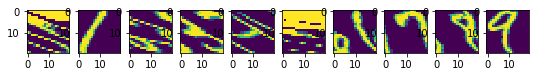

In [81]:
#Digits in bounded box
plt.figure(figsize=(9,9))
label = set(tr_labels)
Y = np.array(tr_labels)
X = tr_images
X = np.array(X)
for i in label:
    plt.subplot(1,10, i+1)
    img = X[Y==i, : ][0].reshape(20,20)
    #print(img)
    plt.imshow(img)